<a href="https://colab.research.google.com/github/vlasova-us/Python_public/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

# Задание
1.   Загрузите файл HR.csv в pandas dataframe 
2.   Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее
скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом
департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке
10. Загрузить jupyter notebook с решение на github и прислать ссылку











In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy import stats

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv ('/content/drive/MyDrive/Data/HR.csv', sep = ',')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Проверка типа данных в df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# рассчет основных статистик для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Рассчет и визуализация корреляционной матрицы для количественных переменных. Определение двух самых скоррелированных и двух наименее скоррелированных переменных.
corr = data.corr()
corr.style.background_gradient(cmap='RdYlGn')


<ipython-input-5-a2711fdcbf50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

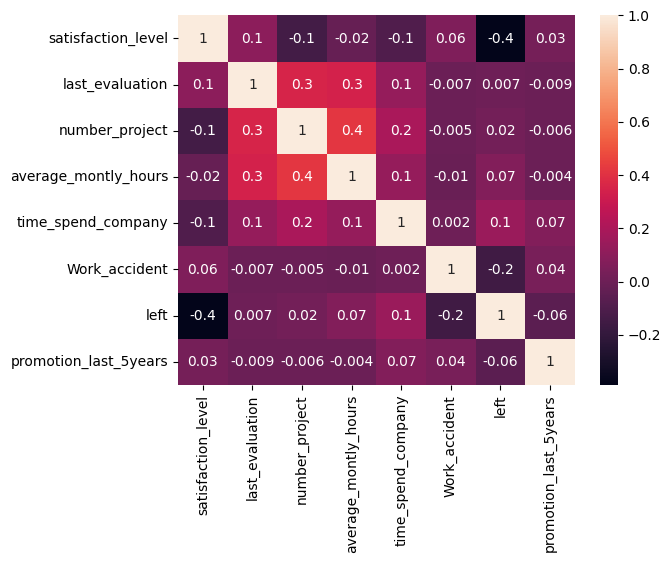

In [6]:
sns.heatmap(corr, annot = True, fmt='.1g')

Наибольшая коррекляция наблюдается между 
- average_montly_hours и number_project 0,4
- last_evaluation и number_project 0,3
- last_evaluation и average_montly_hours 0,3

Наименьшая корреляция наблюдается между 
- left и satisfaction_level -0,4
- left и Work_accident -0,2


In [7]:
#  Подсчет количества сотрудников по отделам
print('Подсчет количества сотрудников по отделам: ', data.groupby(['department']).size())

Подсчет количества сотрудников по отделам:  department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


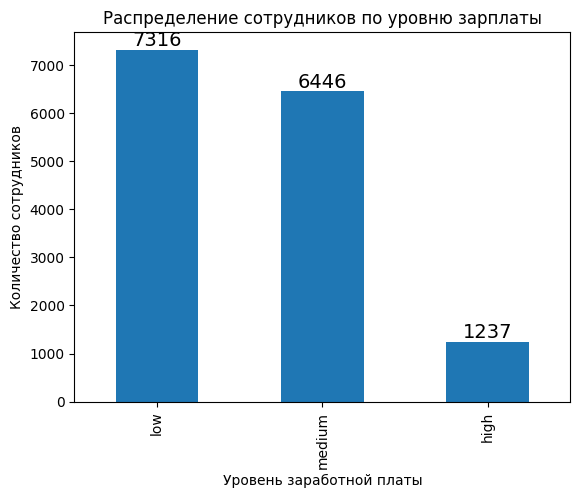

In [8]:
# распределение сотрудников по уровню зарплаты
salary_level = data.groupby(['salary']).size().sort_values(ascending=False)

salary_level.plot(kind='bar', title='Распределение сотрудников по уровню зарплаты',
                             xlabel='Уровень заработной платы',
                             ylabel='Количество сотрудников')
for i, val in enumerate(salary_level.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

department   salary
sales        low       2099
             medium    1772
technical    low       1372
             medium    1147
support      low       1146
             medium     942
IT           low        609
             medium     535
product_mng  low        451
marketing    low        402
product_mng  medium     383
marketing    medium     376
RandD        medium     372
             low        364
hr           medium     359
accounting   low        358
             medium     335
hr           low        335
sales        high       269
management   medium     225
             high       225
technical    high       201
management   low        180
support      high       141
IT           high        83
marketing    high        80
accounting   high        74
product_mng  high        68
RandD        high        51
hr           high        45
dtype: int64


<Axes: title={'center': 'Распределение сотрудников по уровню зарплаты по отделам'}, xlabel='Уровень заработной платы', ylabel='Количество сотрудников'>

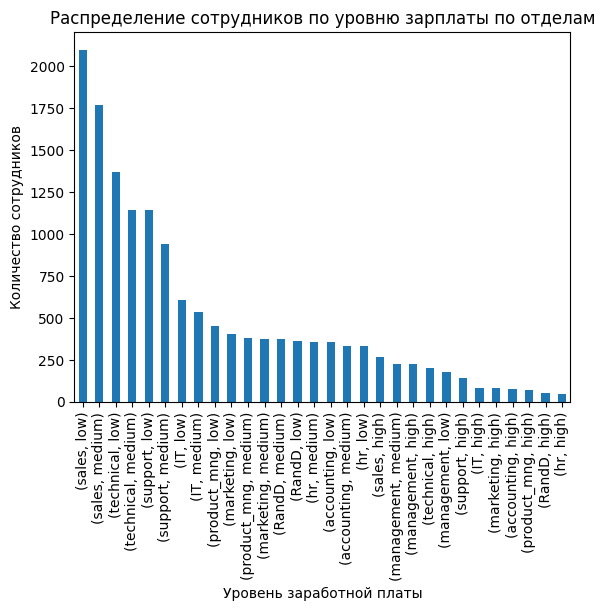

In [9]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
salary_level_for_department = data.groupby(['department','salary']).size().sort_values(ascending=False)
print(salary_level_for_department)

salary_level_for_department.plot(kind='bar', title='Распределение сотрудников по уровню зарплаты по отделам',
                             xlabel='Уровень заработной платы',
                             ylabel='Количество сотрудников')

In [10]:
# Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

## фильтруем df на 2 группы. Считаем среднее проведенное время на работе по каждой группе.
employee_hight_salary = data.loc[(data['salary'] == 'high')]
employee_other_salary = data.loc[(data['salary'] != 'high')]
print ('Среднее время на работе у сотрудников с высокой зарплатой: ', employee_hight_salary['average_montly_hours'].mean().round(2))
print ('Среднее время на работе у сотрудников с низкой и средней зарплатой: ', employee_other_salary['average_montly_hours'].mean().round(2))

Среднее время на работе у сотрудников с высокой зарплатой:  199.87
Среднее время на работе у сотрудников с низкой и средней зарплатой:  201.16


In [11]:
## t -тест Стьюдента.
stat, p = st.ttest_1samp(a = employee_hight_salary['average_montly_hours'], popmean = employee_other_salary['average_montly_hours'].mean())
print(f'Stat ={stat:.3f}, p = {p:.8f}')
if p > 0.05 and employee_hight_salary['average_montly_hours'].mean().round(2) > employee_other_salary['average_montly_hours'].mean().round(2):
  print('Сотрудники с высокой зарплатой проводят на рабочем месте больше времени, чем остальные сотрудники')
else:
  print('Сотрудники с высокой зарплатой не проводят на рабочем месте больше времени, чем остальные сотрудники') 

Stat =-0.950, p = 0.34209548
Сотрудники с высокой зарплатой не проводят на рабочем месте больше времени, чем остальные сотрудники


In [12]:
# Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
# * Доля сотрудников с повышением за последние 5 лет
# * Средняя степень удовлетворенности
# * Среднее количество проектов

# Разделим выборку по критерию: уволился сотрудник либо нет
employee_left = data.loc[(data['left'] == 1)] # сотрудники, которые уволились
employee_no_left = data.loc[(data['left'] != 1)] # сотрудники, которые продолжают работать


# Доля сотрудников с повышением в последние 5 лет
print("Доля сотрудников (в процентах) с повышением в последние 5 лет, кто уволился из компании:  ", 
  round( (len(employee_left [(employee_left['promotion_last_5years'] == 1)])/
   len(employee_left [(employee_left['promotion_last_5years'] != 1)]))*100, 2), '%')

print("Доля сотрудников (в процентах) с повышением в последние 5 лет, кто не уволился из компании:  ", 
  round( (len(employee_no_left [(employee_no_left['promotion_last_5years'] == 1)])/
   len(employee_no_left [(employee_no_left['promotion_last_5years'] != 1)]))*100, 2), '%')

# Средняя степень удовлетворенности
print ('Средняя степень удовлетворенности сотрудников, кто уволился из компаннии равна ', round( employee_left['satisfaction_level'].mean(), 2) )
print ('Средняя степень удовлетворенности сотрудников, кто не уволился из компаннии равна ', round( employee_no_left['satisfaction_level'].mean(), 2) )

# Среднее количество проектов
print ('Среднее количество проектов у сотрудников, кто уволился из компании равна ', round( employee_left['number_project'].mean(), 2) )
print ('Среднее количество проектов у сотрудников, кто не уволился из компании равна ', round( employee_no_left['number_project'].mean(), 2) )

Доля сотрудников (в процентах) с повышением в последние 5 лет, кто уволился из компании:   0.53 %
Доля сотрудников (в процентах) с повышением в последние 5 лет, кто не уволился из компании:   2.7 %
Средняя степень удовлетворенности сотрудников, кто уволился из компаннии равна  0.44
Средняя степень удовлетворенности сотрудников, кто не уволился из компаннии равна  0.67
Среднее количество проектов у сотрудников, кто уволился из компании равна  3.86
Среднее количество проектов у сотрудников, кто не уволился из компании равна  3.79


In [13]:
# Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке
data_predict = data.drop(['department'], axis = 1).drop(['salary'], axis = 1)
data_predict

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [14]:
y = data_predict['left']
X = data_predict.drop(columns=['left'])

In [15]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [16]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [17]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
# разница факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
13388,0.0,NaN
10463,0.0,NaN
5331,0.0,NaN
7499,0.0,NaN


In [20]:
# расчет точности 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

Точность модели 75,6%

In [21]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
        -1.08559074e+00]])